## Intelligent Systems - HW6
### Soroush Mesforush Mashhad
#### SID: 810198472

#### Question 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import random

First of all we initialize the things given in the project description

In [2]:
#head probs
p_h1 = 0.25
p_h2 = 0.55
p_t1 = 1 - p_h1
p_t2 = 1 - p_h2
#discount factor
gamma = 1
#State count
Nstates = 100 #from 0 to 99

We shall write our code as functions to make everything easier

In [3]:
def BellmanEquationForValue(Vs,Rs,state,p_h,p_t):
    #Here we solve the Bellman equation and determine the Delta and best actions
    bids = range(1,min(state+1,101-state))
    BellmanSummation = np.zeros(Nstates+1)
    for i in bids:
        #Here we implement the summation needed in the bellman equation and store it
        # in the array (sum(p(s,s',a)[r + gamma*V(s'))
        # we initialize the indice for heads and tails easily
        heads = i+state
        tails = -i+state
        BellmanSummation[i] = p_h*(Rs[heads]+gamma*Vs[heads]) + p_t*(Rs[tails]+gamma*Vs[tails])
    OptAction = max(BellmanSummation)
    VsBellman = OptAction
    return VsBellman , OptAction

In [4]:
def OptPolicyFinder(Vs,Rs,state,p_h,p_t):
    #Here find the optimal policy as the arguement of the maximum in the bellman summation
    bids = range(1,min(state+1,101-state))
    BellmanSummation = np.zeros(Nstates+1)
    for i in bids:
        heads = i+state
        tails = -i+state
        BellmanSummation[i] = p_h*(Rs[heads]+gamma*Vs[heads]) + p_t*(Rs[tails]+gamma*Vs[tails])  
        OptPol = np.argmax(BellmanSummation)
    return OptPol

In [22]:
def GamblerProb(p_h,p_t):
    threshold = 1e-10 #Theta in textbooks such as Sutton Barto
    #Rewards Array
    Rs = np.zeros(Nstates + 1)
    Vs = np.zeros(Nstates + 1)
    OptPolicies = np.zeros(Nstates)
    #We set Rs[0]= 0 and Rs[100] = 1 as discussed before.
    Rs[100] = 1
    Rs[0] = 0 # Just written to express its importance
    Delta = 0.01
    while Delta>threshold:
        Delta = 0
        for state in range(1,Nstates):
            VsBellman,OptAction = BellmanEquationForValue(Vs,Rs,state,p_h,p_t)
            Delta = max(Delta,np.abs(OptAction-Vs[state]))
            Vs[state] = OptAction
    for state in range(1,Nstates):
        OptPolicies[state] = OptPolicyFinder(Vs,Rs,state,p_h,p_t)
    return Vs,OptPolicies       

In [23]:
def plot(x,y,xlabel,ylabel,title):
    fig = plt.figure(figsize=(10,7))
    plt.plot(x,y,'r')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()

In [24]:
def plotscatter(x,y,xlabel,ylabel,title):
    fig = plt.figure(figsize=(10,7))
    plt.scatter(x,y,color = 'b')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()

In [25]:
def plotbar(x,y,xlabel,ylabel,title):
    fig = plt.figure(figsize=(10,7))
    plt.bar(x,y,color = 'g')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid()

#### p_h = 0.25

In [26]:
Vs,OptPolicies = GamblerProb(p_h1,p_t1)

In [27]:
OptPolicies

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.,  8.,  7., 19., 20.,  4., 22.,  2.,  1., 25.,
        1.,  2.,  3.,  4.,  5.,  6.,  7., 33.,  9., 10., 11., 12., 38.,
       39., 10., 41.,  8., 43., 44.,  5.,  4., 47.,  2.,  1., 50.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       10., 16.,  8., 18., 19., 20.,  4., 22.,  2.,  1., 25.,  1.,  2.,
       22.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [28]:
x = range(100)
#Slicing to prevent from error
y = np.delete(Vs,100)

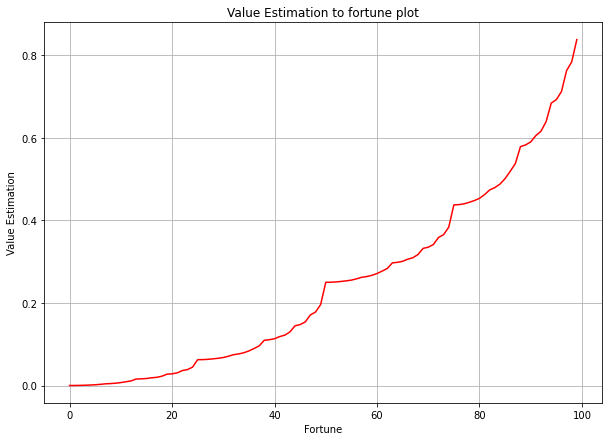

In [29]:
plot(x,y,'Fortune','Value Estimation','Value Estimation to fortune plot')

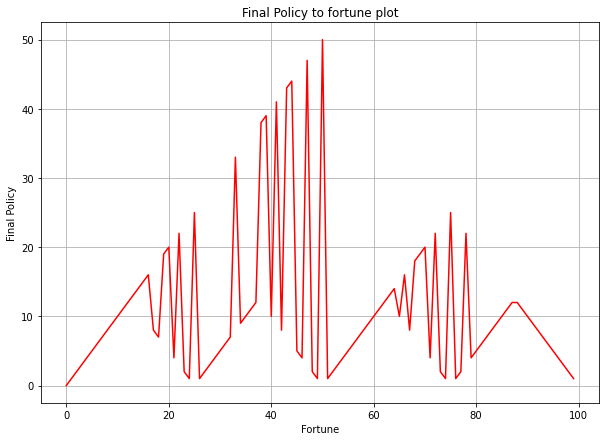

In [30]:
plot(x,OptPolicies,'Fortune','Final Policy','Final Policy to fortune plot')

For better intuition we shall also plot it using the scatter plot and bar plot

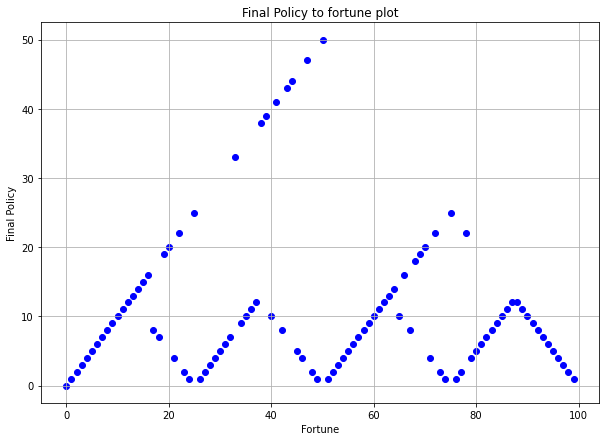

In [31]:
plotscatter(x,OptPolicies,'Fortune','Final Policy','Final Policy to fortune plot')

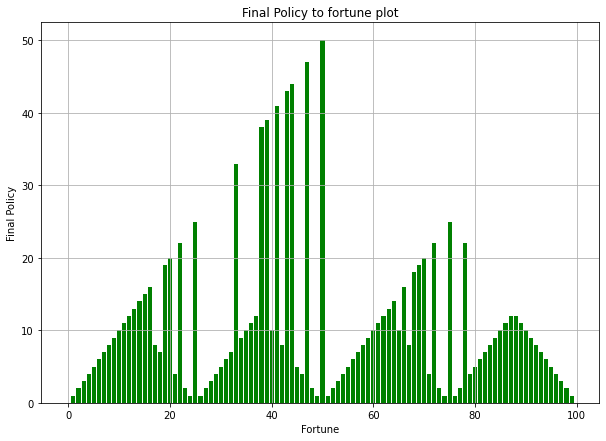

In [32]:
plotbar(x,OptPolicies,'Fortune','Final Policy','Final Policy to fortune plot')

### p_h = 0.55

In [33]:
Vs,OptPolicies = GamblerProb(p_h2,p_t2)

In [34]:
x = range(100)
#Slicing to prevent from error
y = np.delete(Vs,100)

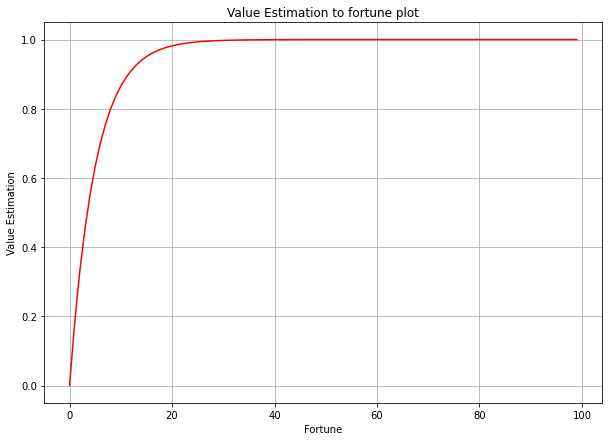

In [35]:
plot(x,y,'Fortune','Value Estimation','Value Estimation to fortune plot')

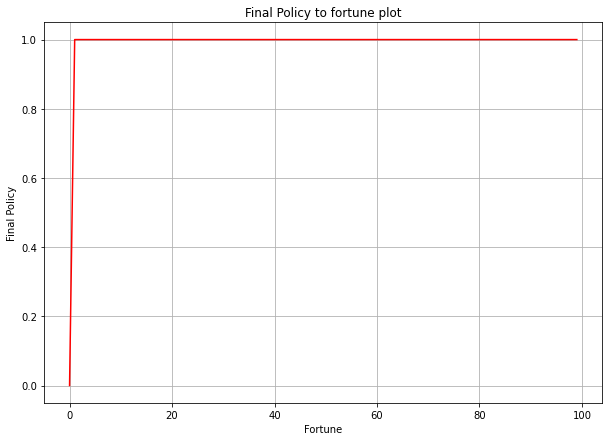

In [36]:
plot(range(100),OptPolicies,'Fortune','Final Policy','Final Policy to fortune plot')

For better intuition we shall also plot it using the scatter plot and bar plot

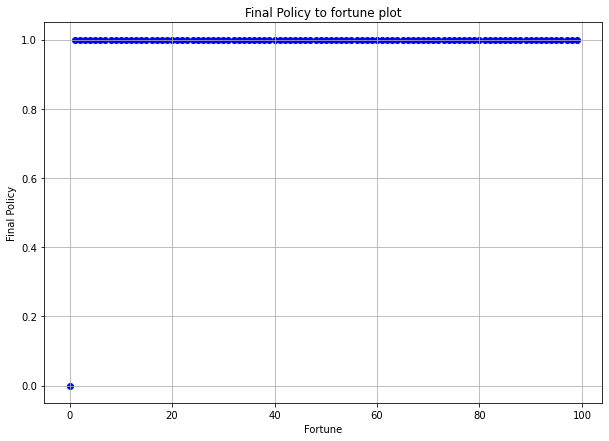

In [37]:
plotscatter(x,OptPolicies,'Fortune','Final Policy','Final Policy to fortune plot')

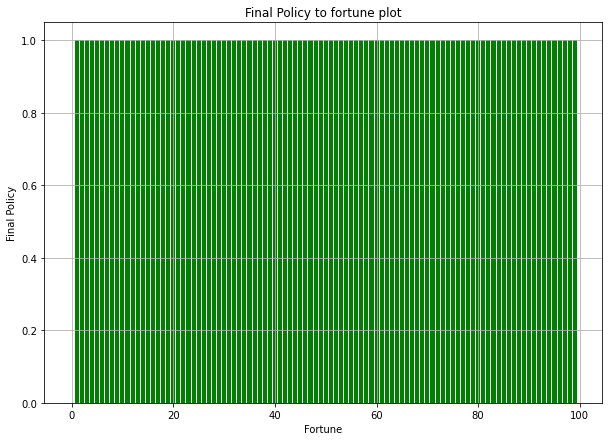

In [38]:
plotbar(x,OptPolicies,'Fortune','Final Policy','Final Policy to fortune plot')